In [1]:
import pandas as pd
import nltk

In [2]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding = 'latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [10]:
data = data.drop_duplicates(keep = 'first')

In [11]:
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4516   4516  Go until jurong point, crazy.. Available only ...    1
spam   653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [14]:
data['SMS_Length'] = data['v2'].apply(len)

In [16]:
data.rename(columns={'v1': 'class', 'v2': 'SMS'}, inplace=True)

In [17]:
data.head()

,class,SMS,SMS_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

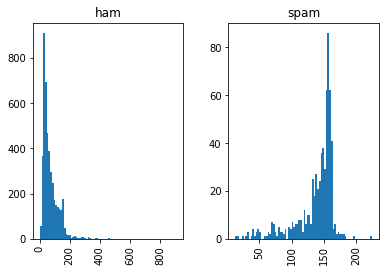

In [31]:
data.hist(column = 'SMS_Length', by = 'class', bins = 80)

In [24]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
import string

In [27]:
def cleaner(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear() 
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [28]:
data['Cleaned_SMS'] = data['SMS'].apply(cleaner)

In [29]:
data.head()

,class,SMS,SMS_Length,Cleaned_SMS
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfIdf = TfidfVectorizer(max_features = 3000)
x = tfIdf.fit_transform(data['Cleaned_SMS']).toarray()

In [35]:
x.shape

(5169, 3000)

In [41]:
x[0,:]

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
y = data['class'].values

In [42]:
y.shape

(5169,)

In [40]:
y[0:3]

array(['ham', 'ham', 'spam'], dtype=object)

In [43]:
tfIdf.vocabulary_

{'go': 1146,
 'point': 1984,
 'crazi': 717,
 'avail': 367,
 'bugi': 509,
 'great': 1175,
 'world': 2936,
 'la': 1465,
 'buffet': 508,
 'cine': 625,
 'got': 1164,
 'wat': 2854,
 'ok': 1853,
 'lar': 1477,
 'joke': 1415,
 'wif': 2899,
 'oni': 1862,
 'free': 1085,
 'entri': 934,
 'wkli': 2920,
 'comp': 668,
 'win': 2904,
 'fa': 988,
 'cup': 733,
 'final': 1040,
 'tkt': 2655,
 '21st': 78,
 'may': 1640,
 'text': 2602,
 'receiv': 2122,
 'question': 2078,
 'std': 2466,
 'txt': 2726,
 'rate': 2099,
 'appli': 317,
 'dun': 876,
 'say': 2242,
 'earli': 881,
 'hor': 1274,
 'alreadi': 271,
 'nah': 1761,
 'think': 2621,
 'goe': 1149,
 'usf': 2787,
 'live': 1535,
 'around': 337,
 'though': 2628,
 'freemsg': 1088,
 'hey': 1244,
 'darl': 751,
 'week': 2870,
 'word': 2933,
 'back': 382,
 'like': 1521,
 'fun': 1103,
 'still': 2473,
 'tb': 2576,
 'xxx': 2962,
 'chg': 607,
 'send': 2278,
 'rcv': 2102,
 'even': 953,
 'brother': 494,
 'speak': 2427,
 'treat': 2700,
 'aid': 247,
 'per': 1933,
 'request': 2159,

In [44]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [59]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9729206963249516


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

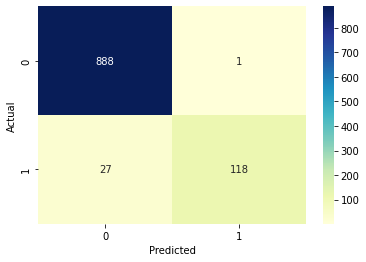

In [69]:
#0: Ham & 1: spam
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()